In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from cabm import post_processing as ppr

In [2]:
# Figure setup
# Set the font to Courier
mpl.rcParams['font.family'] = 'Courier'

# Set the line weight to thin
mpl.rcParams['lines.linewidth'] = 0.75

# Set the color scheme to black and white
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['axes.edgecolor'] = 'black'

In [3]:
agent_df = pd.read_pickle('agent_output_with_both_ad_affects.pkl')

In [4]:
agent_df = ppr.add_date_column(agent_df)

In [5]:
data_A = ppr.calculate_total_purchases(agent_df, ['price_A','tv_A','web_A', 'price_B', 'tv_B', 'web_B'], ['Total_Purchases_A', 'Total_Purchases_B'])

In [6]:
data_A

,Date,Step,price_A,tv_A,web_A,price_B,tv_B,web_B,Total_Purchases_A,Total_Purchases_B
0,2021-01-03,0,5.0,0.0,0.0,5.0,0.0,0.0,0,0
1,2021-01-10,1,5.0,0.0,0.0,5.0,0.0,0.0,31,31
2,2021-01-17,2,5.0,0.0,0.0,5.0,0.0,0.0,196,211
3,2021-01-24,3,5.0,0.0,0.0,5.0,0.0,0.0,275,373
4,2021-01-31,4,5.0,125000.0,0.0,5.0,0.0,0.0,368,411
...,...,...,...,...,...,...,...,...,...,...
199,2024-10-27,199,5.0,0.0,0.0,5.0,0.0,0.0,504,293
200,2024-11-03,200,5.0,0.0,0.0,5.0,0.0,0.0,605,349
201,2024-11-10,201,5.0,0.0,0.0,5.0,0.0,0.0,585,300
202,2024-11-17,202,5.0,0.0,0.0,5.0,0.0,0.0,533,316


In [6]:
data_A = ppr.add_total_sales_columns(data_A, ['Total_Purchases_A', 'Total_Purchases_B'],  ['price_A','price_B'],)

In [7]:
data_A = ppr.ensure_float_columns(data_A, exclude_columns=['Date','Step'])

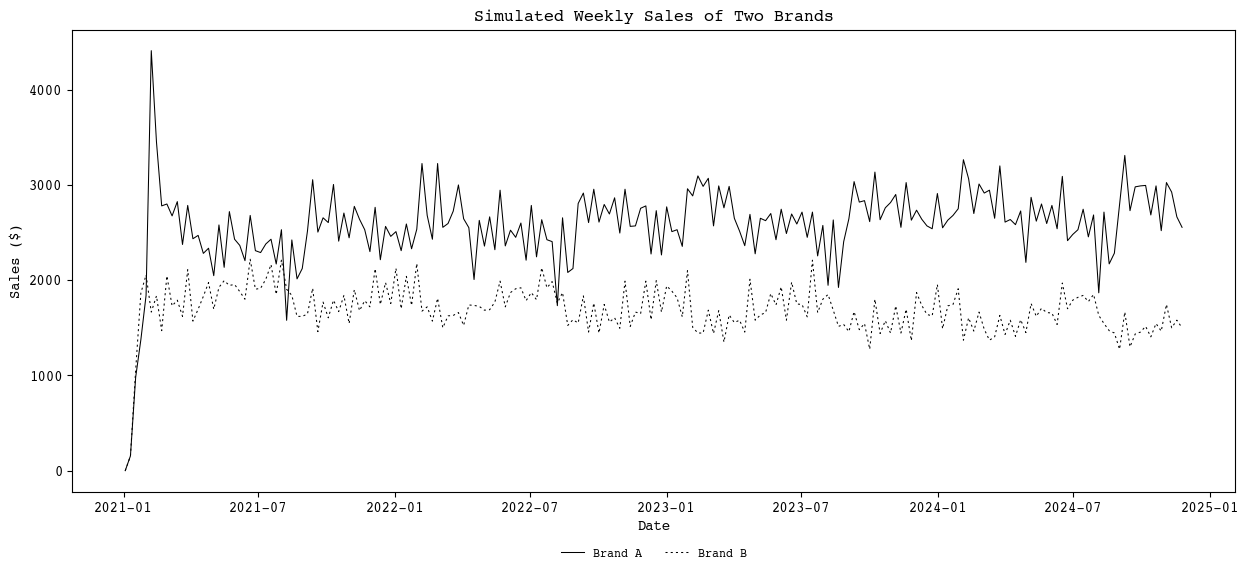

In [8]:
# Create the plot
plt.figure(figsize=(15,6))

plt.plot(data_A['Date'], data_A['Total_Sales_A'], label='Brand A', color='black')
plt.plot(data_A['Date'], data_A['Total_Sales_B'], label='Brand B', color='black', linestyle='--', dashes=[2,3])

plt.title('Simulated Weekly Sales of Two Brands')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2, fontsize='small', frameon=False)

#plt.savefig("A_elast.png", dpi=200)
plt.show()


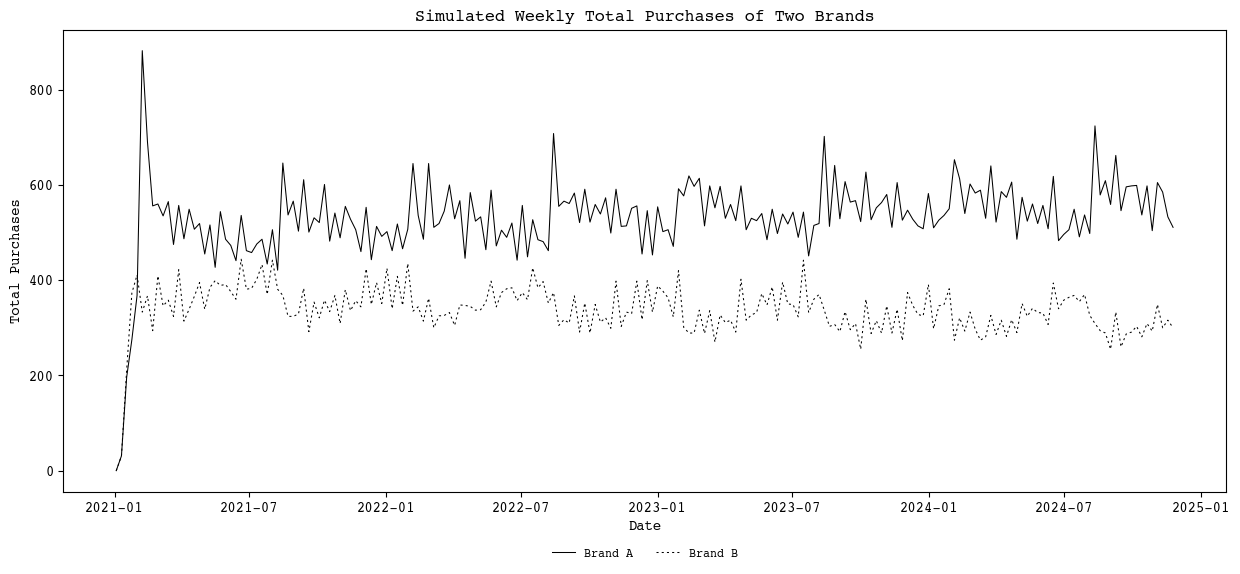

In [9]:
# Create the plot for Total_Purchases
plt.figure(figsize=(15,6))

plt.plot(data_A['Date'], data_A['Total_Purchases_A'], label='Brand A', color='black')
plt.plot(data_A['Date'], data_A['Total_Purchases_B'], label='Brand B', color='black', linestyle='--', dashes=[2,3])

plt.title('Simulated Weekly Total Purchases of Two Brands')
plt.xlabel('Date')
plt.ylabel('Total Purchases')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2, fontsize='small', frameon=False)

#plt.savefig("Total_Purchases.png", dpi=200)
plt.show()


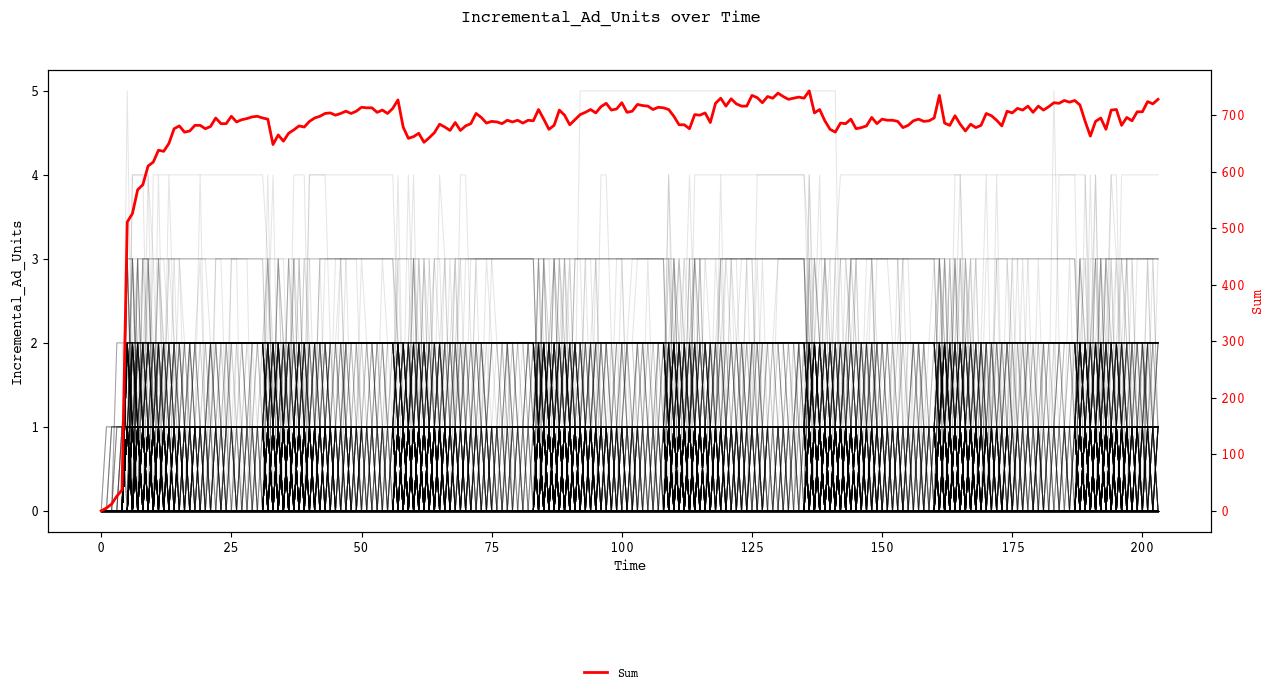

In [10]:
def plot_agent_data_over_time(agent_df, column_name):
    """
    Plots the traces of a specified column's values over time for all agents and the sum value on a separate y-axis.

    Parameters:
    agent_df (pd.DataFrame): The original DataFrame with a MultiIndex of ['Step', 'AgentID'].
    column_name (str): The column name to plot.
    """
    # Reset the index to make 'Step' a column
    agent_df_reset = agent_df.reset_index()

    # Pivot the DataFrame to have 'Step' as the index and 'AgentID' as columns
    pivot_df = agent_df_reset.pivot(index='Step', columns='AgentID', values=column_name)

    # Calculate the sum value over all agents
    pivot_df['Sum'] = pivot_df.sum(axis=1)

    # Plot the traces of all values
    fig, ax1 = plt.subplots(figsize=(15, 6))

    for column in pivot_df.columns[:-1]:  # Exclude the 'Sum' column
        ax1.plot(pivot_df.index, pivot_df[column], color='black', alpha=0.1)  # Fine and semi-transparent lines

    ax1.set_xlabel('Time')
    ax1.set_ylabel(f"{column_name}", color='black')
    ax1.tick_params(axis='y', labelcolor='black')

    # Create a second y-axis to plot the sum value
    ax2 = ax1.twinx()
    ax2.plot(pivot_df.index, pivot_df['Sum'], color='red', linewidth=2, label='Sum')  # Bold line
    ax2.set_ylabel('Sum', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    fig.suptitle(f"{column_name} over Time")
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2, fontsize='small', frameon=False)
    plt.show()

# Example usage:
plot_agent_data_over_time(agent_df, 'Incremental_Ad_Units')

In [11]:
def plot_agent_adstock(agent_df, agent_id):
    '''
    Plots adstock per brand per step for a specific agent from agent level output
    '''
    # Filter the DataFrame for the specified agent
    agent_df_filtered = agent_df.xs(agent_id, level='AgentID')

    # Initialize empty lists to store the results
    adstock_A = []
    adstock_B = []
    dates = []

    # Iterate over the 'Ad_Stock' column
    for index, row in agent_df_filtered.iterrows():
        # Append the adstock for each brand to the respective list
        adstock_A.append(row['Adstock']['A'])
        adstock_B.append(row['Adstock']['B'])
        dates.append(row['Date'])

    # Create the plot
    plt.figure(figsize=(15,6))

    plt.plot(dates, adstock_A, label='Brand A', color='black')
    plt.plot(dates, adstock_B, label='Brand B', color='black', linestyle='--', dashes=[2,3])

    plt.title(f'Adstock of Two Brands Over Time for Agent {agent_id}')
    plt.xlabel('Date')
    plt.ylabel('Adstock')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2, fontsize='small', frameon=False)

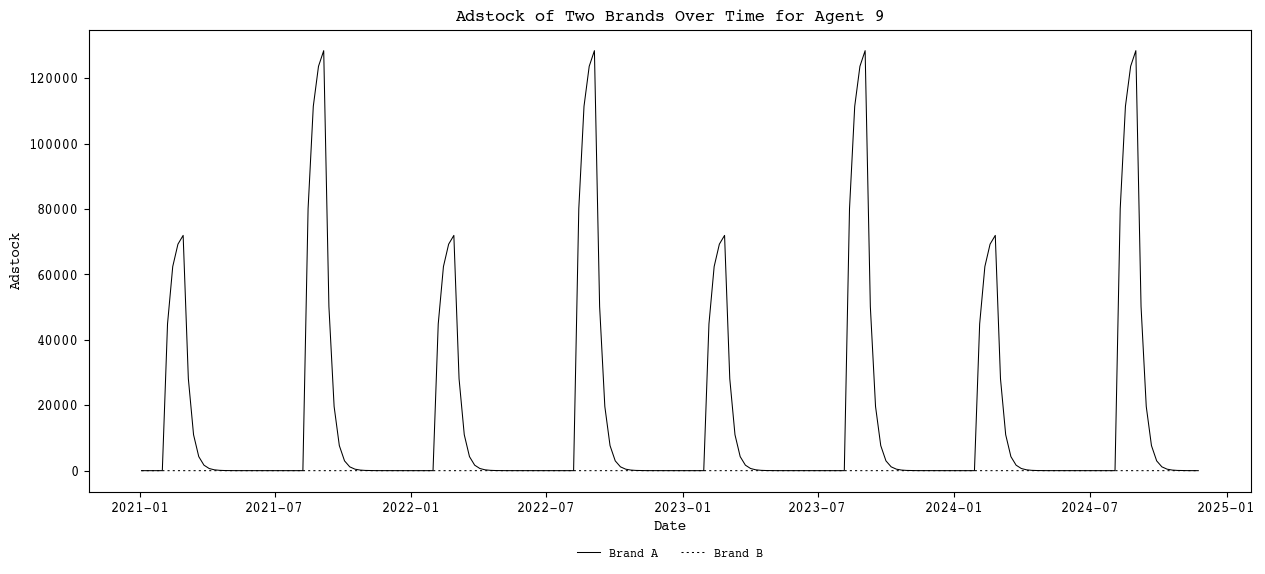

In [12]:
plot_agent_adstock(agent_df, 9)

In [13]:
def plot_agent_column(agent_df, agent_id, column_name):
    '''
    Plots a specified column per step for a specific agent from agent level output.
    This can only be applied to columns containing scale values.
    '''
    # Filter the DataFrame for the specified agent
    agent_df_filtered = agent_df.xs(agent_id, level='AgentID')

    # Check if the column exists in the DataFrame
    if column_name not in agent_df_filtered.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")

    # Extract the dates and the specified column values
    dates = agent_df_filtered['Date']
    column_values = agent_df_filtered[column_name]

    # Create the plot
    plt.figure(figsize=(15, 6))
    plt.plot(dates, column_values, label=column_name, color='blue')

    plt.title(f'{column_name} Over Time for Agent {agent_id}')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=1, fontsize='small', frameon=False)
    plt.grid(True)
    plt.show()


In [15]:
def plot_purchased_this_step(data_dict):
    """
    Plots the values in the provided dictionary.

    Parameters:
    data_dict (dict): A dictionary with keys 'A' and 'B' and their corresponding values.
    """
    # Extract values for each brand
    brand_A_values = [entry['A'] for entry in data_dict]
    brand_B_values = [entry['B'] for entry in data_dict]
    steps = list(range(len(data_dict)))

    # Create the plot
    plt.figure(figsize=(10, 5))
    plt.plot(steps, brand_A_values, label='Brand A', color='black')
    plt.plot(steps, brand_B_values, label='Brand B', color='black', linestyle='--', dashes=[2, 3])

    plt.title('Purchased This Step')
    plt.xlabel('Step')
    plt.ylabel('Purchases')
    plt.legend()
    plt.grid(True)
    plt.show()

In [16]:
def extract_agent_purchases(agent_df, agent_id):
    """
    Extracts the 'Purchased_This_Step' data for a single agent.

    Parameters:
    agent_df (pd.DataFrame): The original DataFrame with a MultiIndex of ['Step', 'AgentID'].
    agent_id (int): The ID of the agent to extract data for.

    Returns:
    list: A list of dictionaries with keys 'A' and 'B' and their corresponding values.
    """
    # Filter the DataFrame for the specified agent
    agent_df_filtered = agent_df.xs(agent_id, level='AgentID')

    # Extract the 'Purchased_This_Step' column as a list of dictionaries
    purchases_list = agent_df_filtered['Purchased_This_Step'].tolist()

    return purchases_list



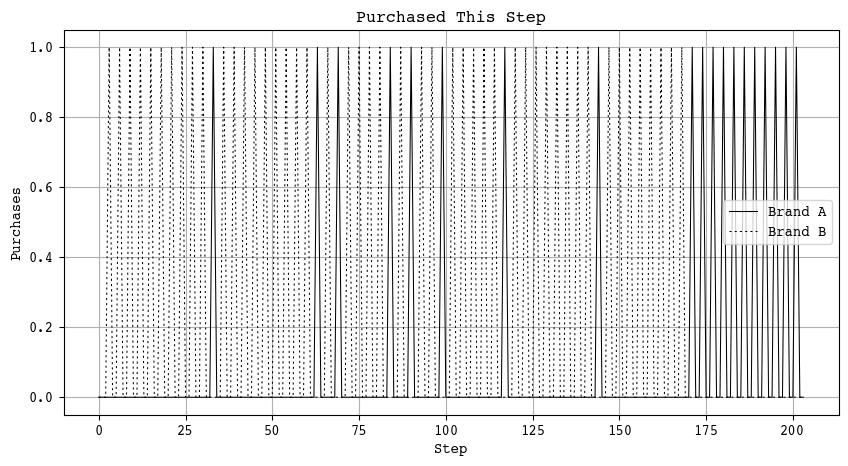

In [18]:
plot_purchased_this_step(extract_agent_purchases(agent_df,5))

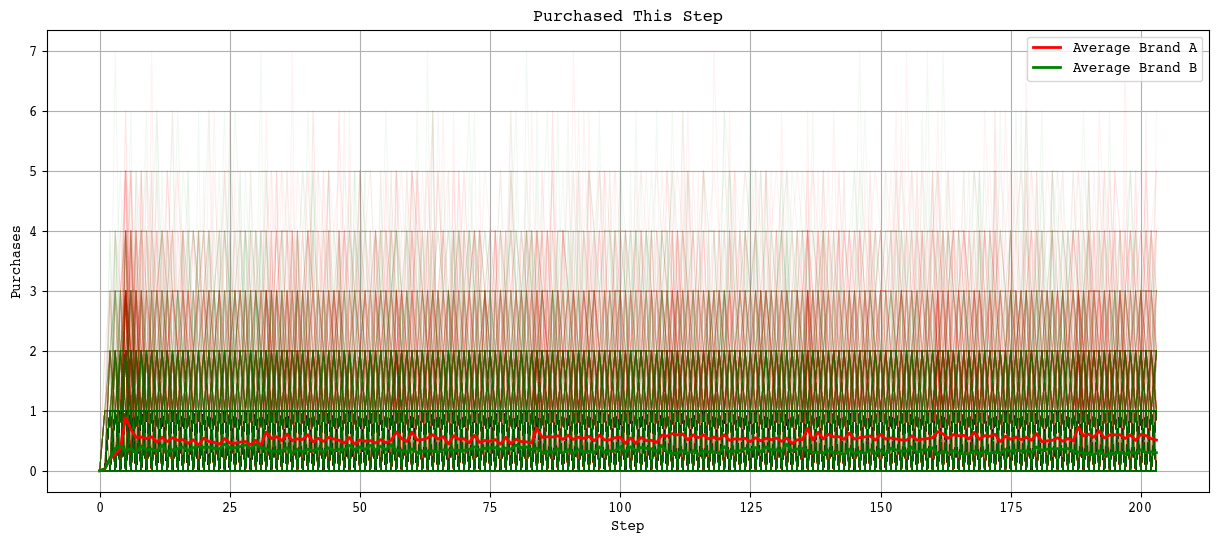

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_purchased_this_step(agent_df):
    """
    Plots the traces of purchases for all agents for each brand and the average purchases.

    Parameters:
    agent_df (pd.DataFrame): The original DataFrame with a MultiIndex of ['Step', 'AgentID'].
    """
    # Initialize lists to store purchases for each brand
    all_purchases_A = []
    all_purchases_B = []

    # Extract purchases for each agent
    for agent_id in agent_df.index.get_level_values('AgentID').unique():
        purchases = extract_agent_purchases(agent_df, agent_id)
        brand_A_values = [entry['A'] for entry in purchases]
        brand_B_values = [entry['B'] for entry in purchases]
        all_purchases_A.append(brand_A_values)
        all_purchases_B.append(brand_B_values)

    # Calculate the average purchases for each brand
    avg_purchases_A = pd.DataFrame(all_purchases_A).mean(axis=0)
    avg_purchases_B = pd.DataFrame(all_purchases_B).mean(axis=0)
    steps = list(range(len(avg_purchases_A)))

    # Create the plot
    plt.figure(figsize=(15, 6))

    # Plot individual agent traces for Brand A
    for purchases in all_purchases_A:
        plt.plot(steps, purchases, color='red', alpha=0.05)

    # Plot individual agent traces for Brand B
    for purchases in all_purchases_B:
        plt.plot(steps, purchases, color='green', alpha=0.05)

    # Plot average purchases for Brand A
    plt.plot(steps, avg_purchases_A, color='red', linewidth=2, label='Average Brand A')

    # Plot average purchases for Brand B
    plt.plot(steps, avg_purchases_B, color='green', linewidth=2, label='Average Brand B')

    plt.title('Purchased This Step')
    plt.xlabel('Step')
    plt.ylabel('Purchases')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_purchased_this_step(agent_df)

/var/folders/l2/z_qwg8756fgc432r7nwvww480000gn/T/ipykernel_3740/1544285124.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper left')


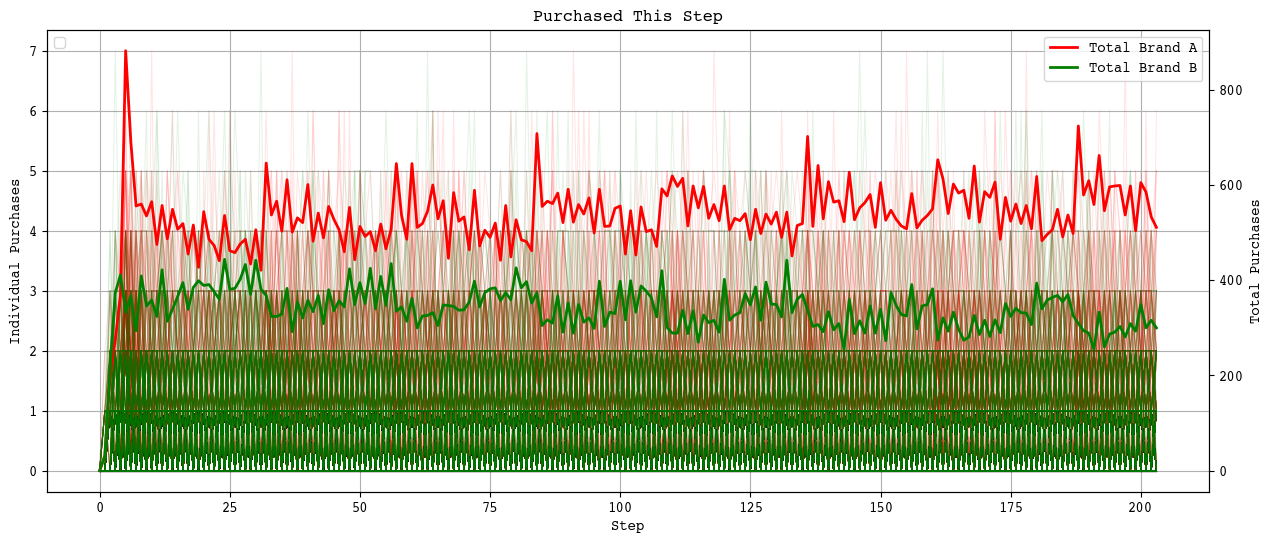

In [20]:
def plot_purchased_this_step(agent_df):
    """
    Plots the traces of purchases for all agents for each brand and the total purchases for each brand on a second y-axis.

    Parameters:
    agent_df (pd.DataFrame): The original DataFrame with a MultiIndex of ['Step', 'AgentID'].
    """
    # Initialize lists to store purchases for each brand
    all_purchases_A = []
    all_purchases_B = []

    # Extract purchases for each agent
    for agent_id in agent_df.index.get_level_values('AgentID').unique():
        purchases = extract_agent_purchases(agent_df, agent_id)
        brand_A_values = [entry['A'] for entry in purchases]
        brand_B_values = [entry['B'] for entry in purchases]
        all_purchases_A.append(brand_A_values)
        all_purchases_B.append(brand_B_values)

    # Calculate the total purchases for each brand
    total_purchases_A = pd.DataFrame(all_purchases_A).sum(axis=0)
    total_purchases_B = pd.DataFrame(all_purchases_B).sum(axis=0)
    steps = list(range(len(total_purchases_A)))

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(15, 6))

    # Plot individual agent traces for Brand A
    for purchases in all_purchases_A:
        ax1.plot(steps, purchases, color='red', alpha=0.1)

    # Plot individual agent traces for Brand B
    for purchases in all_purchases_B:
        ax1.plot(steps, purchases, color='green', alpha=0.1)

    ax1.set_xlabel('Step')
    ax1.set_ylabel('Individual Purchases')
    ax1.grid(True)

    # Create a second y-axis for the total purchases
    ax2 = ax1.twinx()
    ax2.plot(steps, total_purchases_A, color='red', linewidth=2, label='Total Brand A')
    ax2.plot(steps, total_purchases_B, color='green', linewidth=2, label='Total Brand B')
    ax2.set_ylabel('Total Purchases')

    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.title('Purchased This Step')
    plt.show()

# Example usage:
plot_purchased_this_step(agent_df)

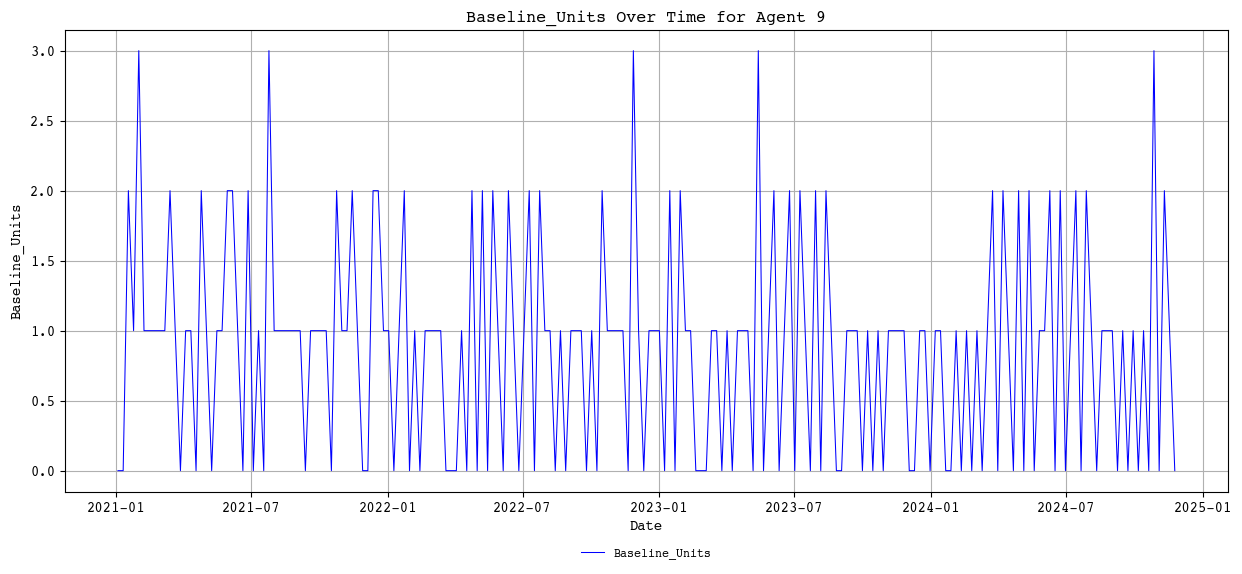

In [21]:
plot_agent_column(agent_df,9,'Baseline_Units')

In [22]:

def get_pretty_agent_attributes(agent_df, agent_id):
    """
    Returns a pretty printed dictionary of static agent attributes.

    Parameters:
    - agent_df: DataFrame containing agent data.
    - agent_id: The ID of the agent to extract attributes for.

    Returns:
    - A dictionary with key-value pairs for the specified columns.
    """
    # Define the columns to extract
    columns = [
        'Household_Size', 'Consumption_Rate', 'Brand_Preference', 
        'Loyalty_Rate', 'Ad_Decay_Factor', 'Pantry_Min', 'Pantry_Max'
    ]
    
    # Filter the DataFrame for the specified agent
    agent_df_filtered = agent_df.xs(agent_id, level='AgentID')
    
    # Construct the dictionary with the specified columns
    attributes = {col: agent_df_filtered[col].iloc[0] for col in columns}
    
    # # Pretty print the dictionary
    # pprint.pprint(attributes)
    
    return attributes



In [23]:
get_pretty_agent_attributes(agent_df, 9)

{'Household_Size': 5,
 'Consumption_Rate': 2.4750646759003088,
 'Brand_Preference': 'B',
 'Loyalty_Rate': 0.8948669200034542,
 'Ad_Decay_Factor': 2.5587132048474235,
 'Pantry_Min': 0.5,
 'Pantry_Max': 4}

In [24]:
agent_df.xs(3, level='AgentID').columns

Index(['Household_Size', 'Consumption_Rate', 'Brand_Preference',
       'Brand_Choice', 'Loyalty_Rate', 'Purchase_Probabilities', 'Enable_Ads',
       'Ad_Decay_Factor', 'Ad_Channel_Preference', 'Adstock', 'Pantry_Min',
       'Pantry_Max', 'Pantry_Stock', 'Purchased_This_Step', 'Current_Price',
       'Last_Product_Price', 'Step_Min', 'Step_Max', 'Units_to_Purchase',
       'Baseline_Units', 'Incremental_Promo_Units', 'Incremental_Ad_Units',
       'Decremental_Units', 'Price_Change', 'price_A', 'tv_A', 'web_A',
       'price_B', 'tv_B', 'web_B', 'Date'],
      dtype='object')

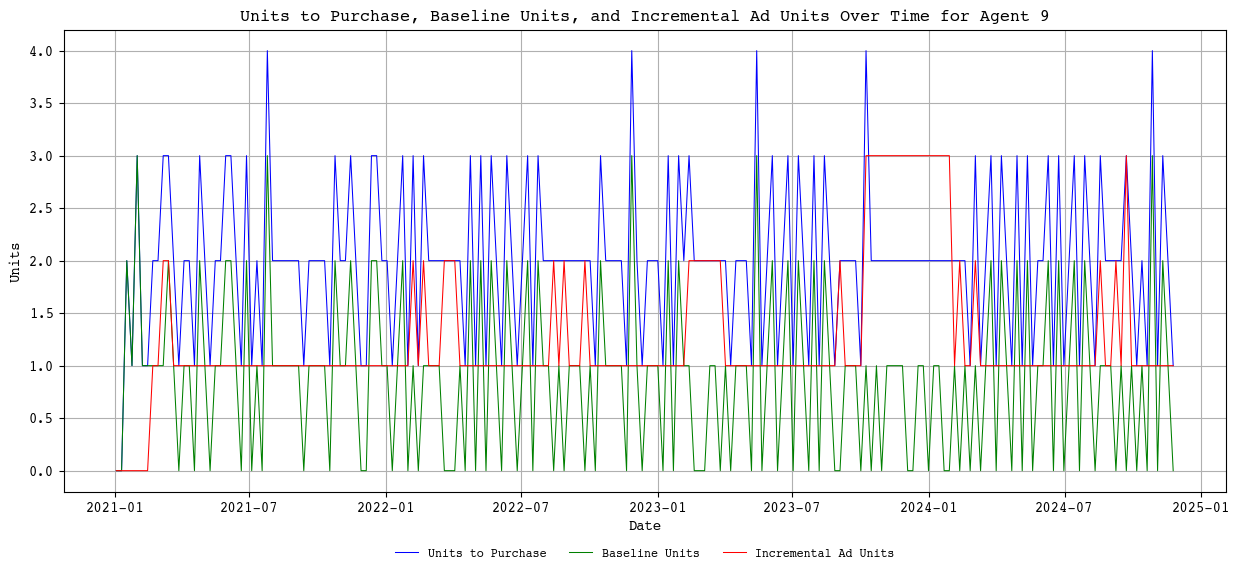

In [25]:
def plot_agent_units(agent_df, agent_id):
    """
    Plots Units_to_Purchase, Baseline_Units, and Incremental_Ad_Units for a given agent.

    Parameters:
    agent_df (pd.DataFrame): The original DataFrame with a MultiIndex of ['Step', 'AgentID'].
    agent_id (int): The ID of the agent to plot data for.
    """
    # Filter the DataFrame for the specified agent
    agent_df_filtered = agent_df.xs(agent_id, level='AgentID')

    # Extract the dates and the specified columns
    dates = agent_df_filtered['Date']
    units_to_purchase = agent_df_filtered['Units_to_Purchase']
    baseline_units = agent_df_filtered['Baseline_Units']
    incremental_ad_units = agent_df_filtered['Incremental_Ad_Units']

    # Create the plot
    plt.figure(figsize=(15, 6))
    plt.plot(dates, units_to_purchase, label='Units to Purchase', color='blue')
    plt.plot(dates, baseline_units, label='Baseline Units', color='green')
    plt.plot(dates, incremental_ad_units, label='Incremental Ad Units', color='red')

    plt.title(f'Units to Purchase, Baseline Units, and Incremental Ad Units Over Time for Agent {agent_id}')
    plt.xlabel('Date')
    plt.ylabel('Units')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=3, fontsize='small', frameon=False)
    plt.grid(True)
    plt.show()

# Example usage:
plot_agent_units(agent_df, 9)

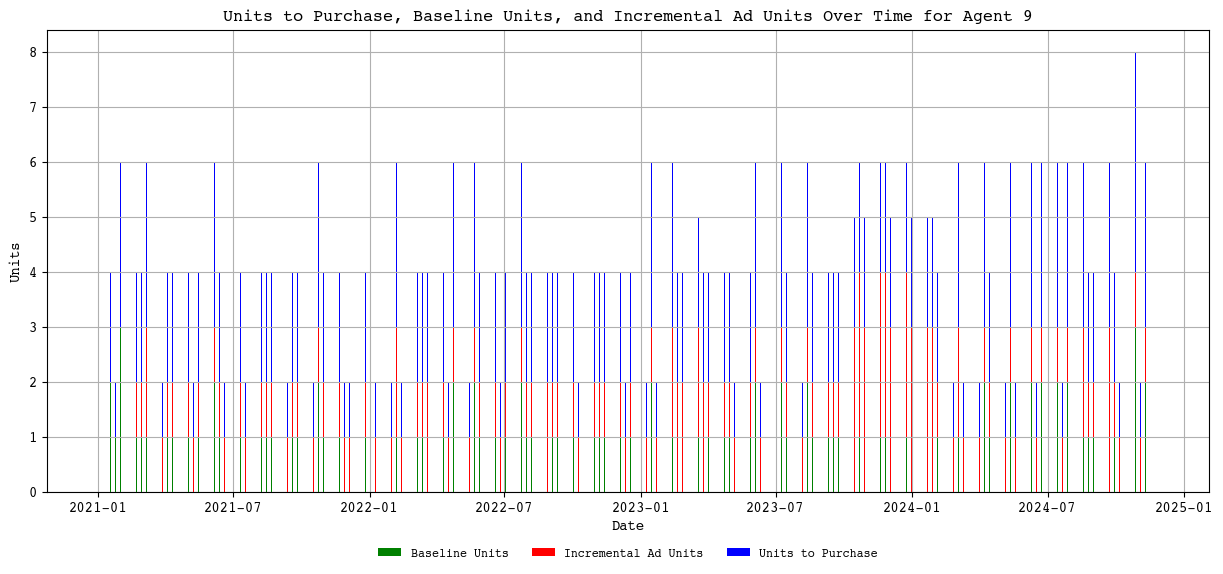

In [26]:
def plot_agent_units(agent_df, agent_id):
    """
    Plots Units_to_Purchase, Baseline_Units, and Incremental_Ad_Units for a given agent as stacked bars.

    Parameters:
    agent_df (pd.DataFrame): The original DataFrame with a MultiIndex of ['Step', 'AgentID'].
    agent_id (int): The ID of the agent to plot data for.
    """
    # Filter the DataFrame for the specified agent
    agent_df_filtered = agent_df.xs(agent_id, level='AgentID')

    # Extract the dates and the specified columns
    dates = agent_df_filtered['Date']
    units_to_purchase = agent_df_filtered['Units_to_Purchase']
    baseline_units = agent_df_filtered['Baseline_Units']
    incremental_ad_units = agent_df_filtered['Incremental_Ad_Units']

    # Create the plot
    plt.figure(figsize=(15, 6))
    plt.bar(dates, baseline_units, label='Baseline Units', color='green')
    plt.bar(dates, incremental_ad_units, bottom=baseline_units, label='Incremental Ad Units', color='red')
    plt.bar(dates, units_to_purchase, bottom=baseline_units + incremental_ad_units, label='Units to Purchase', color='blue')

    plt.title(f'Units to Purchase, Baseline Units, and Incremental Ad Units Over Time for Agent {agent_id}')
    plt.xlabel('Date')
    plt.ylabel('Units')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=3, fontsize='small', frameon=False)
    plt.grid(True)
    plt.show()

# Example usage:
plot_agent_units(agent_df, 9)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import waterfall_chart

def summarize_agent_data(agent_df, start_date, end_date):
    """
    Summarizes the agent data for a specified time period.

    Parameters:
    agent_df (pd.DataFrame): The original DataFrame with a MultiIndex of ['Step', 'AgentID'].
    start_date (str): The start date of the period to summarize (inclusive).
    end_date (str): The end date of the period to summarize (inclusive).

    Returns:
    pd.DataFrame: A DataFrame with the summarized data.
    """
    # Filter the DataFrame for the specified time period
    mask = (agent_df['Date'] >= start_date) & (agent_df['Date'] <= end_date)
    filtered_df = agent_df[mask]

    # Initialize empty lists to store the results
    purchases_data = {
        'Units_to_Purchase': [],
        'Baseline_Units': [],
        'Incremental_Promo_Units': [],
        'Incremental_Ad_Units': [],
        'Decremental_Units': []
    }
    brands = []
    dates = []
    steps = []

    # Iterate over the filtered DataFrame
    for index, row in filtered_df.iterrows():
        # Append the values for each column to the respective list
        for col in purchases_data.keys():
            purchases_data[col].append(row[col])
        brands.append(row['Brand'])
        dates.append(row['Date'])
        steps.append(index[0])  # Assuming 'Step' is the first level of the index

    # Create a new DataFrame with the aggregated data
    summary_df = pd.DataFrame(
        {
            **purchases_data,
            'Brand': brands,
            'Date': dates,
            'Step': steps,
        }
    )

    # Group by 'Brand' and sum the purchases
    summary_df = summary_df.groupby('Brand').agg(
        {
            'Units_to_Purchase': 'sum',
            'Baseline_Units': 'sum',
            'Incremental_Promo_Units': 'sum',
            'Incremental_Ad_Units': 'sum',
            'Decremental_Units': 'sum'
        }
    ).reset_index()

    return summary_df

def plot_waterfall_chart(summary_df):
    """
    Plots a waterfall chart of the summarized data.

    Parameters:
    summary_df (pd.DataFrame): The summarized DataFrame.
    """
    # Prepare data for the waterfall chart
    data = []
    for _, row in summary_df.iterrows():
        brand = row['Brand']
        data.append((f'{brand} Baseline', row['Baseline_Units']))
        data.append((f'{brand} Promo', row['Incremental_Promo_Units']))
        data.append((f'{brand} Ad', row['Incremental_Ad_Units']))
        data.append((f'{brand} Decrement', -row['Decremental_Units']))

    # Create the waterfall chart
    waterfall_chart.plot(data, rotation_value=45, formatting='{:,.0f}')
    plt.title('Waterfall Chart of Units to Purchase by Brand')
    plt.ylabel('Units')
    plt.show()

# Example usage:
start_date = '2023-01-01'
end_date = '2023-12-31'
summary_df = summarize_agent_data(agent_df, start_date, end_date)
plot_waterfall_chart(summary_df)

KeyError: 'Brand'

In [29]:
agent_df

Household_Size  Consumption_Rate Brand_Preference Brand_Choice  \
Step AgentID                                                                   
0    0                     2          1.970529                B            B   
     1                     2          3.397886                A            A   
     2                     2          4.976111                A            A   
     3                     1          2.126118                A            A   
     4                     1          1.085528                A            A   
...                      ...               ...              ...          ...   
203  137                   1          3.747918                A            A   
     349                   1          2.970147                A            A   
     578                   1          3.702008                A            A   
     884                   2          5.156632                A            A   
     591                   4          4.539311                A            A   

              Loyalty_Rate                             Purchase_Probabilities  \
Step AgentID                                                                    
0    0            0.955641  {'A': 0.04435881747063786, 'B': 0.955641182529...   
     1            0.765631  {'A': 0.7656314284968547, 'B': 0.2343685715031...   
     2            0.994624  {'A': 0.9946242956713564, 'B': 0.0053757043286...   
     3            0.855406  {'A': 0.8554056195254831, 'B': 0.1445943804745...   
     4            0.859099  {'A': 0.8590989420817997, 'B': 0.1409010579182...   
...                    ...                                                ...   
203  137          0.905385  {'A': 0.937793185382754, 'B': 0.06220681461724...   
     349          0.937545  {'A': 0.937544712331906, 'B': 0.06245528766809...   
     578          0.822927  {'A': 0.921714347704553, 'B': 0.07828565229544...   
     884          0.923740  {'A': 0.9618090051225076, 'B': 0.0381909948774...   
     591          0.943912  {'A': 0.9744260041673195, 'B': 0.0255739958326...   

              Enable_Ads  Ad_Decay_Factor  \
Step AgentID                                
0    0              True         1.942079   
     1              True         1.287007   
     2              True         2.254536   
     3              True         2.852798   
     4              True         1.564484   
...                  ...              ...   
203  137            True         2.475307   
     349            True         2.885738   
     578            True         1.235279   
     884            True         2.265779   
     591            True         2.005324   

                                          Ad_Channel_Preference  \
Step AgentID                                                      
0    0        {'TV': 0.5726599461566402, 'Web': 0.4273400538...   
     1        {'TV': 0.14834217656671572, 'Web': 0.851657823...   
     2        {'TV': 0.38906340654938737, 'Web': 0.610936593...   
     3        {'TV': 0.26547286013568405, 'Web': 0.734527139...   
     4        {'TV': 0.36873839722004226, 'Web': 0.631261602...   
...                                                         ...   
203  137      {'TV': 0.4425219989387726, 'Web': 0.5574780010...   
     349      {'TV': 0.3170567032276045, 'Web': 0.6829432967...   
     578      {'TV': 0.36804507864946273, 'Web': 0.631954921...   
     884      {'TV': 0.24015920533381807, 'Web': 0.759840794...   
     591      {'TV': 0.3039916245574319, 'Web': 0.6960083754...   

                                          Adstock  ...  Incremental_Ad_Units  \
Step AgentID                                       ...                         
0    0                           {'A': 0, 'B': 0}  ...                     0   
     1                           {'A': 0, 'B': 0}  ...                     0   
     2                           {'A': 0, 'B': 0}  ...                     0   
     3                           {'A': 0, 'B': 0}  ...       